In [1]:
!pip install tensorflow opencv-python matplotlib

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip available: 22.3 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip list

Package                      Version
---------------------------- --------------
absl-py                      2.2.2
anyio                        4.9.0
argon2-cffi                  23.1.0
argon2-cffi-bindings         21.2.0
arrow                        1.3.0
asttokens                    3.0.0
astunparse                   1.6.3
async-lru                    2.0.5
attrs                        25.3.0
babel                        2.17.0
beautifulsoup4               4.13.4
bleach                       6.2.0
certifi                      2025.4.26
cffi                         1.17.1
charset-normalizer           3.4.2
colorama                     0.4.6
comm                         0.2.2
contourpy                    1.3.2
cycler                       0.12.1
debugpy                      1.8.14
decorator                    5.2.1
defusedxml                   0.7.1
executing                    2.2.0
fastjsonschema               2.21.1
flatbuffers                  25.2.10
fonttools                    


[notice] A new release of pip available: 22.3 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import tensorflow as tf
import os 

In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')

In [5]:
len(gpus)

0

In [6]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimantal.set_memory_growth(gpu, True)

In [7]:
import cv2
import imghdr
import matplotlib 
import matplotlib.pyplot as plt

C:\Users\aryan\AppData\Local\Temp\ipykernel_35348\4125188683.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [8]:
data_dir = 'data'

In [9]:
os.listdir(data_dir)

['happyppl', 'sadppl']

In [10]:
image_exts = ['jpeg','jpg','bmp','png']

In [11]:
image_exts

['jpeg', 'jpg', 'bmp', 'png']

In [12]:
img = cv2.imread(os.path.join('data', 'happyppl','89ca5d41335b4f9207b9cf03538a7dbd63497e474912837562cb9f58809a.png')) #access the img trought directory

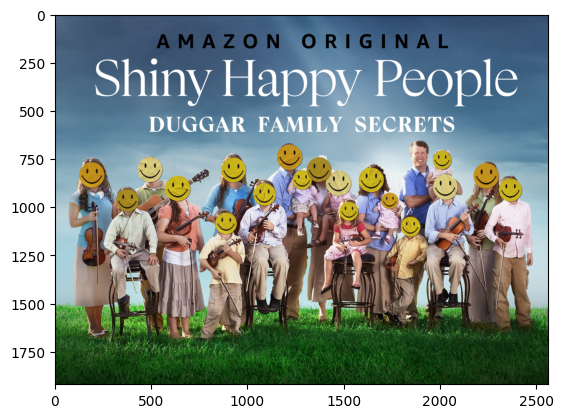

In [13]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) #switches from open cv2's BGR to RGB

In [14]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not it ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

In [15]:
tf.data.Dataset??

Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
class DatasetV2(
    collections_abc.Iterable,
    tracking_base.Trackable,
    composite_tensor.CompositeTensor,
    data_types.DatasetV2,
    metaclass=abc.ABCMeta):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dty

In [16]:
import numpy as np
from matplotlib import pyplot as plt

In [17]:
data = tf.keras.utils.image_dataset_from_directory('data') # DATA SET

Found 253 files belonging to 2 classes.


In [18]:
data_iterator = data.as_numpy_iterator()

In [19]:
batch = data_iterator.next() #get another batch from the iterator

In [20]:
batch[0].shape #img represented as numpy arrays

(32, 256, 256, 3)

In [21]:
batch[1] #differentiates happy and sad files with 0 and 1
#1 - sad ppl
#0- happy ppl

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int32)

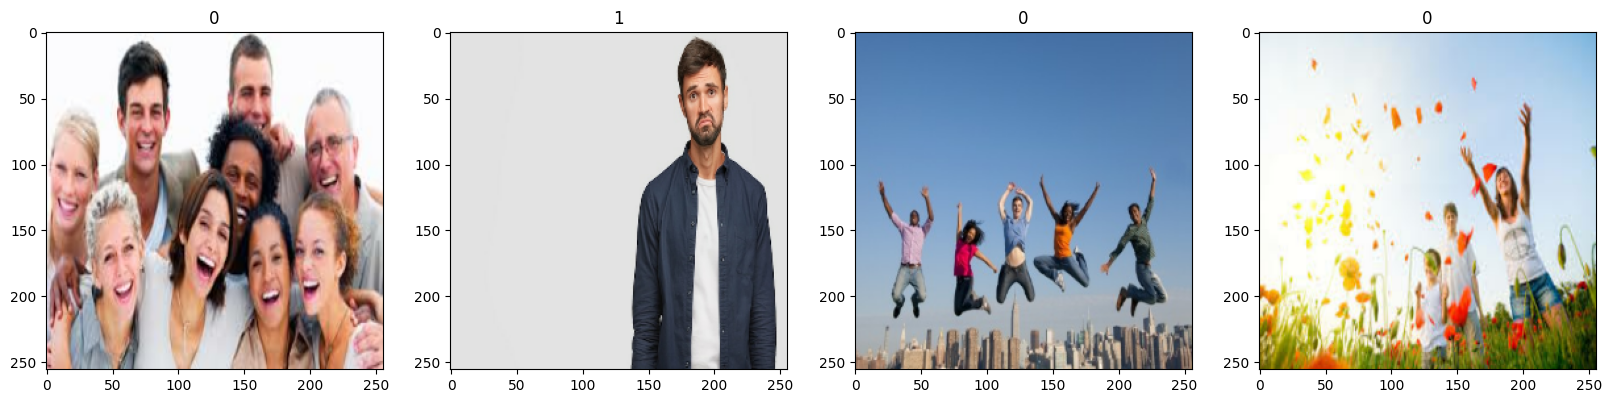

In [22]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [23]:
#PRE-PROCESSING DATA

In [24]:
data = data.map(lambda x,y: (x/255, y))

In [25]:
scaled_iterator = data.as_numpy_iterator()

In [26]:
batch = scaled_iterator.next()

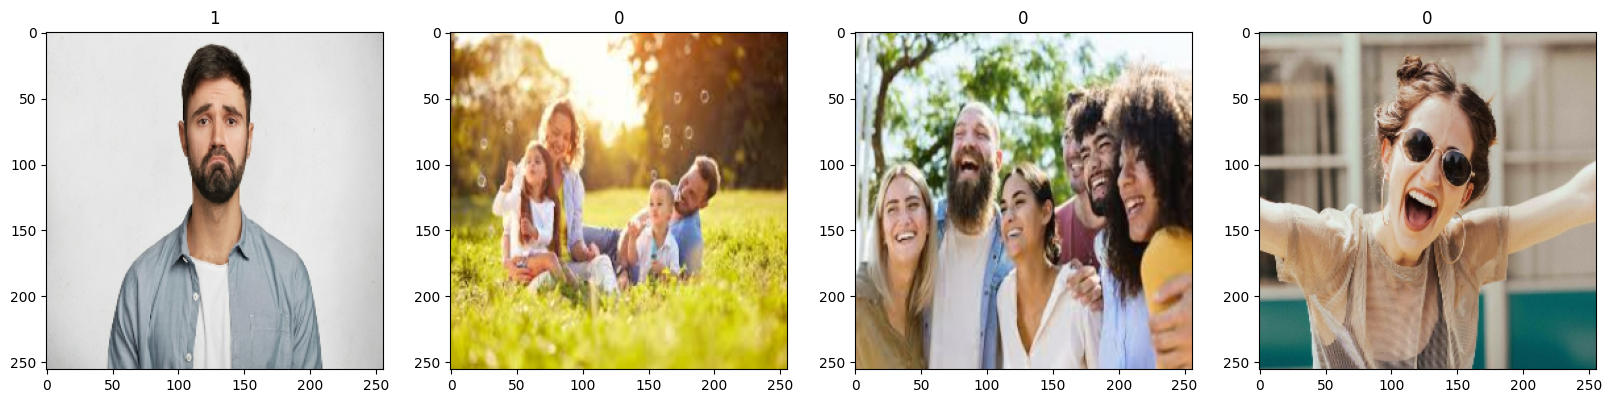

In [27]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [28]:
train_size = int(len(data)*.7) # to train our model
val_size = int(len(data)*.2)+1 # evaluate out model while we are training 
test_size = int(len(data)*.1)+1 # post trainging 

In [29]:
train = data.take(train_size)  # how many bathces allocated to training data 
val = data.skip(train_size).take(val_size) # skip allocted training bathces and take 2 for val
test = data.skip(train_size+val_size).take(test_size)

In [30]:
# DEEP MODEL / LEARNING

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [32]:
model = Sequential()

In [33]:
#16 filters to shape the img

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation = 'relu')) #linear way to display output 
model.add(Dense(1, activation='sigmoid')) # single output to represnt 0 or 1



C:\Users\aryan\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [35]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
logdir='logs'

In [37]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [38]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 883ms/step - accuracy: 0.4383 - loss: 1.1397 - val_accuracy: 0.3281 - val_loss: 0.7192
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 618ms/step - accuracy: 0.5389 - loss: 0.6326 - val_accuracy: 0.7656 - val_loss: 0.4483
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 603ms/step - accuracy: 0.7436 - loss: 0.4890 - val_accuracy: 0.7656 - val_loss: 0.5341
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 745ms/step - accuracy: 0.8229 - loss: 0.4887 - val_accuracy: 0.7500 - val_loss: 0.4850
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 546ms/step - accuracy: 0.7727 - loss: 0.3742 - val_accuracy: 0.8594 - val_loss: 0.4184
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 677ms/step - accuracy: 0.8069 - loss: 0.4570 - val_accuracy: 0.8281 - val_loss: 0.4296
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 684ms/step - accuracy: 0.8409 - loss: 0.3327 - val_accuracy: 0.9062 - val_loss: 0.3238
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 589ms/step - accuracy: 0.9126 - loss: 0.2890 - val_accuracy: 0.8125 - val_loss:

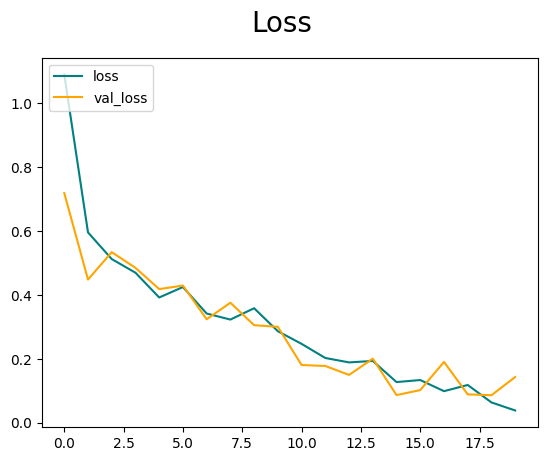

In [39]:
#visualize 
fig=plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

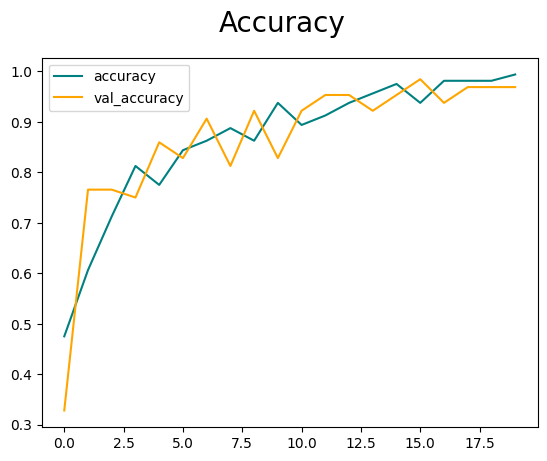

In [40]:
#visualize 
fig=plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [41]:
#Evaluate 

In [42]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [43]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [44]:
for batch in test.as_numpy_iterator():
    X,y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


In [45]:
 print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


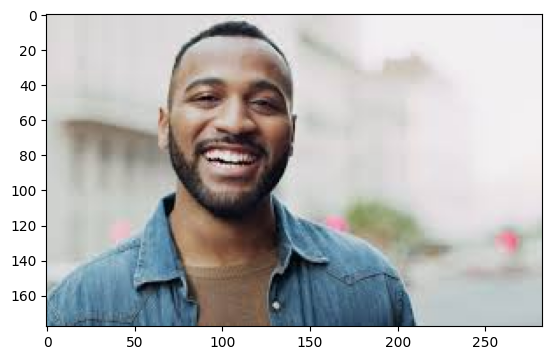

In [46]:
img = cv2.imread('happytest.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

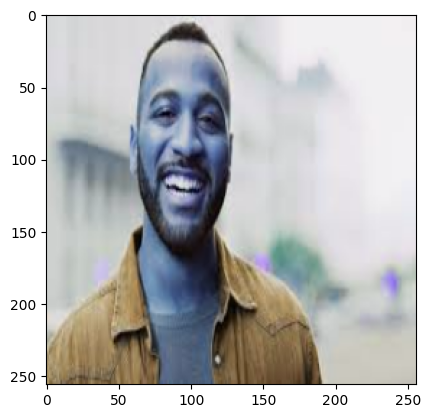

In [47]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [48]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [49]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


In [50]:
yhat

array([[0.03877983]], dtype=float32)

In [51]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')


Predicted class is Happy


In [52]:
from tensorflow.keras.models import load_model

In [53]:
model.save(os.path.join('models','imageclassificationapplication.h5'))


In [54]:
new_model = load_model(os.path.join('models', 'imageclassificationapplication.h5'))


In [55]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


array([[0.03877983]], dtype=float32)

In [56]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')


Predicted class is Happy
